In [7]:
from sklearn.model_selection import train_test_split
from common import standard_scaling
from sklearn.linear_model import SGDRegressor
from tqdm import tqdm
import numpy as np

In [8]:
def learning_schedule(t):
    return t0/(t+t1)

def new_sgd(X_train, t_train, theta, n_epoch, batch_size, eta):
    n_batches = int(X_train.shape[0] // batch_size)
    Xt = np.concatenate((X_train, t_train), axis=1)
    print(f"Number of minibatches: {n_batches}")
    for epoch in tqdm(range(n_epoch), f"Training {n_epoch} epochs"):      
        batches = np.take(Xt, np.random.permutation(Xt.shape[0]), axis=0)
        batches = np.array_split(batches, n_batches, axis=0)
        
        for batch in batches:
            xi = batch[:, :-1]
            yi = batch[:, -1].reshape(-1,1)
            gradients = 2.0* xi.T @ ((xi @ theta)-yi)
            eta = 0.1
            theta = theta - eta*gradients

    print(f"theta from new SGD: {theta.ravel()}")

In [19]:
#np.random.seed(4155)

n = 1000
x = 2*np.random.rand(n,1)
t = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
X = X[:,1:]

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, shuffle=True)
X_train, X_test = standard_scaling(X_train, X_test)
t_train, t_test = standard_scaling(t_train, t_test)

_,features_X = X_train.shape 
theta = np.random.randn(features_X,1)
eta = 0.1

n_epochs = 1000
batch_size = 5  #size of each minibatch

new_sgd(X_train, t_train, theta, n_epochs, batch_size, eta)

sgdreg = SGDRegressor(max_iter = n_epochs, penalty=None, eta0=eta)
sgdreg.fit(X_train,t_train.ravel())
print(f"sgdreg from scikit: {sgdreg.coef_}")
# print(f"sgdreg from scikit: {sgdreg.intercept_}, {sgdreg.coef_}")

Number of minibatches: 160


Training 1000 epochs: 100%|██████████| 1000/1000 [00:01<00:00, 651.13it/s]

theta from new SGD: [0.42895411]
sgdreg from scikit: [0.79830304]


# Old code

Own inversion
[[4.12189569]
 [2.90678358]]
sgdreg from scikit
[4.13898159] [2.89623936]
theta from own gd
[[4.12189569]
 [2.90678358]]
theta from own sdg
[[4.18519562]
 [2.88055342]]


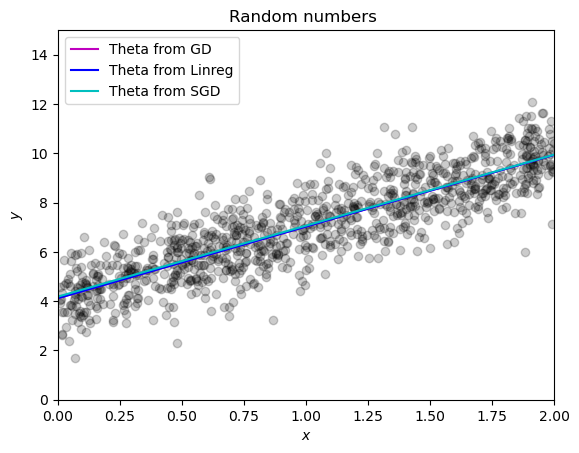

In [20]:
# Sketch of SGd based on code imported from the lecture week40 thursday

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

n_epochs = 1000

X = np.c_[np.ones((n,1)), x]
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(max_iter = n_epochs, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(2,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)



M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = M, n_epochs
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2.0* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

ypredict3 = Xnew.dot(theta)

plt.plot(x, y ,'ko', alpha=0.2)
plt.plot(xnew, ypredict, "m-", label="Theta from GD")
plt.plot(xnew, ypredict2, "b-", label="Theta from Linreg")
plt.plot(xnew, ypredict3, "c-", label="Theta from SGD")
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()


In [ ]:
def own_sgd(X_train, t_train, theta, n_epoch, M):
    m = int(X_train.shape[0]/M) #number of minibatches
    print(f"Number of minibatches: {m}")
    for epoch in tqdm(range(n_epoch), f"Looping throug {n_epoch} epochs"):
        indices = np.arange(X_train.shape[0])
        drawn = []
        for i in range(m):
            # Draw datapoints to the batch
            idx = np.random.choice(np.delete(indices, drawn), M, replace=False)
            drawn.append(idx)
            print(f"Minibatch: {idx}")
            
            # Train the model
            xi = X_train[idx]
            yi = t_train[idx]
            gradients = 2.0* xi.T @ ((xi @ theta)-yi)
            #eta = learning_schedule(epoch*m+i)
            eta = 0.1
            theta = theta - eta*gradients
        
        remain = np.delete(indices, drawn)
        if np.any(remain):
            print(f"Training on remaing datapoints: {remain}")
            xi = X_train[remain]
            yi = t_train[remain]
            gradients = 2.0* xi.T @ ((xi @ theta)-yi)
            #eta = learning_schedule(epoch*m+i)
            eta = 0.1
            theta = theta - eta*gradients
  
    print(f"theta from own SGD: {theta.ravel()}")

def learning_schedule(t):
    return t0/(t+t1)

def _train_sgd(X_train, t_train, batch, theta, epoch, i, m):
    xi = X_train[batch]
    yi = t_train[batch]
    gradients = 2.0* xi.T @ ((xi @ theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients
